<a href="https://colab.research.google.com/github/krishaashah/Diabetes_Prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

DATA COLLECTION AND ANALYSIS

In [70]:
diabetes_df = pd.read_csv('diabetes_prediction.csv')
diabetes_df.head()


,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes


In [71]:
diabetes_df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Family_History,0
Physical_Activity,0
Diet_Type,0
Smoking_Status,0
Alcohol_Intake,1780
Stress_Level,0
Hypertension,0


In [72]:
diabetes_df.columns

Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio',
       'Urban_Rural', 'Health_Insurance', 'Regular_Checkups',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result',
       'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition',
       'Diabetes_Status'],
      dtype='object')

FEATURE ENGINEERING

In [73]:
#Dropping irrelevant columns
diabetes_sorted_df = diabetes_df.drop(columns=['Pregnancies', 'Polycystic_Ovary_Syndrome', 'Urban_Rural','Health_Insurance', 'Regular_Checkups',
       'Medication_For_Chronic_Conditions', 'Thyroid_Condition'])

In [74]:
diabetes_sorted_df.head()

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,111.7,141.0,165.6,8.9,94,0.91,124.3,31.5,7.46,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,130.6,83.1,142.6,5.9,68,0.96,151.4,12.5,5.64,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,294.8,159.9,212.4,4.8,70,0.88,106.1,35.8,7.20,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,159.1,133.3,225.4,11.9,78,0.98,85.6,15.4,6.53,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,215.0,164.9,218.1,11.6,65,0.85,77.0,28.6,0.58,Yes


In [75]:
diabetes_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5292 non-null   int64  
 1   Gender                         5292 non-null   object 
 2   BMI                            5292 non-null   float64
 3   Family_History                 5292 non-null   object 
 4   Physical_Activity              5292 non-null   object 
 5   Diet_Type                      5292 non-null   object 
 6   Smoking_Status                 5292 non-null   object 
 7   Alcohol_Intake                 3512 non-null   object 
 8   Stress_Level                   5292 non-null   object 
 9   Hypertension                   5292 non-null   object 
 10  Cholesterol_Level              5292 non-null   float64
 11  Fasting_Blood_Sugar            5292 non-null   float64
 12  Postprandial_Blood_Sugar       5292 non-null   f

In [76]:
diabetes_sorted_df['Alcohol_Intake'] = diabetes_sorted_df['Alcohol_Intake'].replace([None,"Never"], "Never")
diabetes_sorted_df['Alcohol_Intake'].unique()

array(['Never', 'Moderate', 'High'], dtype=object)

In [77]:
diabetes_sorted_df['Stress_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [78]:
# Classification based on BMI.
def divide(val):
    if val in range(18,25):
        return "Healthy(18-24)"
    elif val<18:
        return "Underweight(<25)"
    elif val>25:
        return "Obese(>25)"

diabetes_sorted_df['BMI_Division'] = diabetes_sorted_df['BMI'].apply(divide)

In [79]:
# Classification based on AGE.
def group(age):
    if age in range(18,35):
        return "Young Adults"
    elif age in range(35,60):
        return "Working Age"
    elif age>60:
        return "Senior Citizens"
diabetes_sorted_df['Age_Group'] = diabetes_sorted_df['Age'].apply(group)

DATA VISUALIZATION

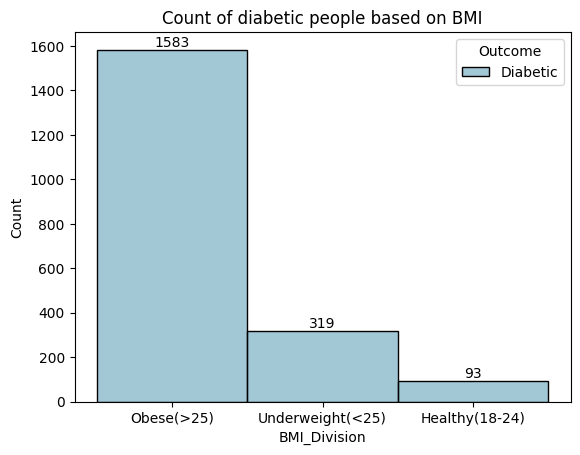

In [80]:
# Count of diabetic people based on BMI
diabetic_data = diabetes_sorted_df[diabetes_sorted_df['Diabetes_Status'] == "Yes"]
custom_colors = ['#4793AF']
ax = sns.histplot(x = 'BMI_Division', data=diabetic_data, hue='Diabetes_Status', palette=custom_colors)
ax.bar_label(ax.containers[0])
plt.title('Count of diabetic people based on BMI')
plt.legend(title='Outcome', labels=['Diabetic'])
plt.show()

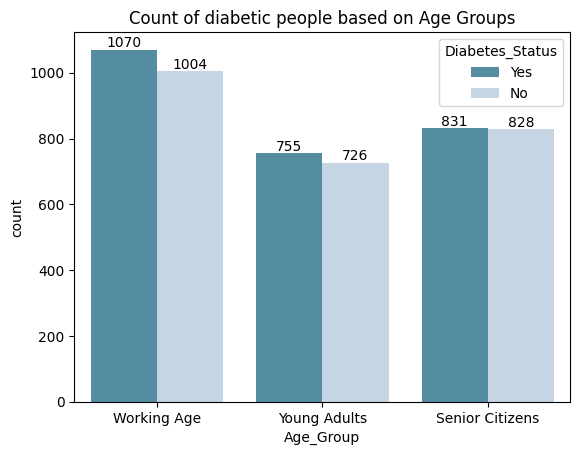

In [81]:
# Count of diabetic people based on Age
custom_colors = ['#4793AF', '#C0D6E8']
ax = sns.countplot(x='Age_Group', data=diabetes_sorted_df, hue='Diabetes_Status', palette=custom_colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of diabetic people based on Age Groups')
plt.show()

Converting Categorical Data into Numeric Data

In [82]:
 def mapping(col):
  custom_mapping = {'No': 0, 'Yes': 1}
  return col.map(custom_mapping)

In [83]:
# Can also be done using np.where method.
diabetes_sorted_df['Hypertension'] = mapping(diabetes_sorted_df['Hypertension'])
diabetes_sorted_df['Family_History'] = mapping(diabetes_sorted_df['Family_History'])
diabetes_sorted_df['Diabetes_Status'] = mapping(diabetes_sorted_df['Diabetes_Status'])

In [84]:
# Performing Ordinal Encoding
encoder = OrdinalEncoder(categories=[['Never', 'Moderate', 'High'], ['Never', 'Former', 'Current'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High']])
diabetes_sorted_df[['Alcohol_Intake', 'Smoking_Status', 'Physical_Activity', 'Stress_Level']] = encoder.fit_transform(diabetes_sorted_df[['Alcohol_Intake', 'Smoking_Status', 'Physical_Activity', 'Stress_Level']])

In [85]:
# Performing Label Encoding
le = LabelEncoder()
diabetes_sorted_df['Gender'] = le.fit_transform(diabetes_sorted_df['Gender'])
diabetes_sorted_df['Diet_Type'] = le.fit_transform(diabetes_sorted_df['Diet_Type'])
diabetes_sorted_df['BMI_Division'] = le.fit_transform(diabetes_sorted_df['BMI_Division'])
diabetes_sorted_df['Age_Group'] = le.fit_transform(diabetes_sorted_df['Age_Group'])

In [86]:
diabetes_sorted_df = diabetes_sorted_df.drop(columns=['Age', 'BMI'])

In [87]:
# Categorical Dataset
diabetes_sorted_df.head()

,Gender,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Diabetes_Status,BMI_Division,Age_Group
0,1,0,2.0,0,0.0,0.0,1.0,1,111.7,141.0,165.6,8.9,94,0.91,124.3,31.5,7.46,1,1,1
1,2,1,1.0,0,2.0,1.0,2.0,0,130.6,83.1,142.6,5.9,68,0.96,151.4,12.5,5.64,0,1,2
2,2,1,2.0,0,2.0,1.0,2.0,1,294.8,159.9,212.4,4.8,70,0.88,106.1,35.8,7.20,1,1,2
3,0,0,1.0,2,1.0,1.0,2.0,1,159.1,133.3,225.4,11.9,78,0.98,85.6,15.4,6.53,0,1,2
4,1,0,2.0,0,2.0,2.0,2.0,0,215.0,164.9,218.1,11.6,65,0.85,77.0,28.6,0.58,1,1,0


In [88]:
# Displaying statistical measures
diabetes_sorted_df.describe()

,Gender,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Diabetes_Status,BMI_Division,Age_Group
count,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000
mean,0.996599,0.496599,1.003401,0.979781,0.997543,0.996977,1.011905,0.512850,199.777098,124.940193,164.709902,8.226909,89.787415,0.949399,135.011867,29.909883,5.258743,0.510960,1.594860,0.995843
std,0.813087,0.500036,0.814481,0.819674,0.819689,0.818418,0.820528,0.499882,57.103759,32.091770,43.152803,2.179662,17.238430,0.144871,37.541696,11.527951,2.754500,0.499927,0.901015,0.807720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,70.000000,90.100000,4.500000,60.000000,0.700000,70.100000,10.000000,0.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.100000,97.100000,128.175000,6.300000,75.000000,0.820000,102.175000,20.000000,2.880000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,198.600000,124.050000,164.950000,8.200000,90.000000,0.950000,136.000000,29.800000,5.270000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,249.100000,153.300000,201.000000,10.100000,105.000000,1.080000,167.100000,39.900000,7.660000,1.000000,3.000000,2.000000
max,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,300.000000,180.000000,240.000000,12.000000,119.000000,1.200000,200.000000,50.000000,10.000000,1.000000,3.000000,3.000000


In [89]:
# # Displaying the correlation matrix to examine the relationships between the columns.
# corr_matrix = diabetes_sorted_df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
# plt.title("Correlation Heatmap")
# plt.show()

Feature Engineering for Optimal Results.

In [90]:
final_data = diabetes_sorted_df[['Cholesterol_Level', 'Fasting_Blood_Sugar', 'Postprandial_Blood_Sugar', 'HBA1C','Heart_Rate', 'C_Protein_Level','Glucose_Tolerance_Test_Result', 'Vitamin_D_Level', 'BMI_Division', 'Waist_Hip_Ratio','Age_Group', 'Diabetes_Status']]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cholesterol_Level              5292 non-null   float64
 1   Fasting_Blood_Sugar            5292 non-null   float64
 2   Postprandial_Blood_Sugar       5292 non-null   float64
 3   HBA1C                          5292 non-null   float64
 4   Heart_Rate                     5292 non-null   int64  
 5   C_Protein_Level                5292 non-null   float64
 6   Glucose_Tolerance_Test_Result  5292 non-null   float64
 7   Vitamin_D_Level                5292 non-null   float64
 8   BMI_Division                   5292 non-null   int64  
 9   Waist_Hip_Ratio                5292 non-null   float64
 10  Age_Group                      5292 non-null   int64  
 11  Diabetes_Status                5292 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 496.3 KB


In [91]:
final_data['Diabetes_Status'].value_counts()

,count
Diabetes_Status,
1,2704
0,2588


# Dealing with inconsistent data

## HBA1C vs Diabetes Status

Higher HBA1C levels are indicator of pre-diabetic and diabetic conditions. For example, HBA1C level of 7.5 or higher usually indicate that Diabetic Status. In several of the row entries, the subject is reported to have HBA1C level of 7.5 or higher, but the Diabetes Status is reported as negative. Perhaps this indicates some inconsistency in the data reporting or data collection.

In [92]:
final_data[(final_data['HBA1C'] > 7.5) & (final_data['Diabetes_Status'] == 0)].head()

,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,C_Protein_Level,Glucose_Tolerance_Test_Result,Vitamin_D_Level,BMI_Division,Waist_Hip_Ratio,Age_Group,Diabetes_Status
3,159.1,133.3,225.4,11.9,78,6.53,85.6,15.4,1,0.98,2,0
6,276.5,170.0,237.3,7.6,74,8.24,78.6,11.7,1,1.11,1,0
7,101.9,92.0,175.9,9.2,81,3.39,140.6,25.8,3,1.16,2,0
8,288.8,147.1,154.8,8.7,95,3.86,87.5,18.4,3,0.87,2,0
19,145.7,167.5,194.4,8.6,77,6.31,193.4,43.2,3,1.14,1,0


## Fasting blood sugar vs post prandial blood sugar

It is expected that the fasting blood sugar is lower when compared to the post prandial blood sugar. Dataset contains several entries where fasting blood sugar is much higher when compared to the post prandial blood sugar. This does not make sense.

In [93]:
diabetes_data = final_data[final_data['Fasting_Blood_Sugar'] < final_data['Postprandial_Blood_Sugar']]
print(diabetes_data.shape)
diabetes_data.head()

(4021, 12)


,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,C_Protein_Level,Glucose_Tolerance_Test_Result,Vitamin_D_Level,BMI_Division,Waist_Hip_Ratio,Age_Group,Diabetes_Status
0,111.7,141.0,165.6,8.9,94,7.46,124.3,31.5,1,0.91,1,1
1,130.6,83.1,142.6,5.9,68,5.64,151.4,12.5,1,0.96,2,0
2,294.8,159.9,212.4,4.8,70,7.20,106.1,35.8,1,0.88,2,1
3,159.1,133.3,225.4,11.9,78,6.53,85.6,15.4,1,0.98,2,0
4,215.0,164.9,218.1,11.6,65,0.58,77.0,28.6,1,0.85,0,1


We drop all such rows which exhibit these type of data inconsistencies.


In [94]:
diabetes_final_df = diabetes_data.drop(diabetes_data[(diabetes_data['HBA1C'] > 7.5) & (diabetes_data['Diabetes_Status'] == 0)].index)
print(diabetes_final_df.shape)

(2836, 12)


In [95]:
diabetes_final_df['Diabetes_Status'].value_counts()

,count
Diabetes_Status,
1,2054
0,782


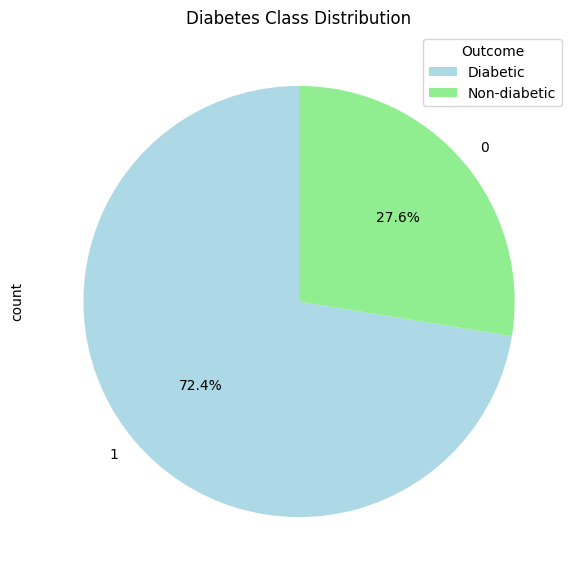

In [96]:
# Pie chart of class distribution
class_counts = diabetes_final_df['Diabetes_Status'].value_counts()

class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7, 7), colors=['lightblue', 'lightgreen'])
plt.title('Diabetes Class Distribution')
plt.legend(title='Outcome', labels=['Diabetic','Non-diabetic'])
plt.show()

IMBALANCED DATASET

Separating Target Variable and Outcome.

X-> Target variable   

y-> Outcome

In [97]:
x = diabetes_final_df.drop(columns='Diabetes_Status', axis=1)
y = diabetes_final_df

In [98]:
x.head()

,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,C_Protein_Level,Glucose_Tolerance_Test_Result,Vitamin_D_Level,BMI_Division,Waist_Hip_Ratio,Age_Group
0,111.7,141.0,165.6,8.9,94,7.46,124.3,31.5,1,0.91,1
1,130.6,83.1,142.6,5.9,68,5.64,151.4,12.5,1,0.96,2
2,294.8,159.9,212.4,4.8,70,7.20,106.1,35.8,1,0.88,2
4,215.0,164.9,218.1,11.6,65,0.58,77.0,28.6,1,0.85,0
5,160.2,77.8,238.2,4.7,69,1.83,180.2,49.0,3,0.88,3


Checking for Outliers.

In [99]:
z_scores = (x - x.mean()) / x.std()
threshold = 3

outliers = (z_scores.abs() > threshold)

outlier_rows = x[outliers.any(axis=1)]
print("Outlier rows:\n", outlier_rows)

Outlier rows:
 Empty DataFrame
Columns: [Cholesterol_Level, Fasting_Blood_Sugar, Postprandial_Blood_Sugar, HBA1C, Heart_Rate, C_Protein_Level, Glucose_Tolerance_Test_Result, Vitamin_D_Level, BMI_Division, Waist_Hip_Ratio, Age_Group]
Index: []


STANDARDIZATION

In [100]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
print(standardized_data)

[[-1.56829255  0.80153014 -0.33396063 ... -0.67695492 -0.272838
   0.01727988]
 [-1.2357263  -1.10350629 -0.92559557 ... -0.67695492  0.07517341
   1.24242361]
 [ 1.65355297  1.42338141  0.86988784 ... -0.67695492 -0.48164485
   1.24242361]
 ...
 [-0.57235341 -1.50820314  1.51811394 ...  1.51214902  1.18880992
   0.01727988]
 [ 1.30690984  1.75240324  0.50976223 ...  1.51214902 -0.20323572
  -1.20786384]
 [-1.54365802  1.21938787 -0.29280342 ... -1.77150689 -0.20323572
   0.01727988]]


In [101]:
X = standardized_data
Y = diabetes_final_df['Diabetes_Status']

In [102]:
print(X)

[[-1.56829255  0.80153014 -0.33396063 ... -0.67695492 -0.272838
   0.01727988]
 [-1.2357263  -1.10350629 -0.92559557 ... -0.67695492  0.07517341
   1.24242361]
 [ 1.65355297  1.42338141  0.86988784 ... -0.67695492 -0.48164485
   1.24242361]
 ...
 [-0.57235341 -1.50820314  1.51811394 ...  1.51214902  1.18880992
   0.01727988]
 [ 1.30690984  1.75240324  0.50976223 ...  1.51214902 -0.20323572
  -1.20786384]
 [-1.54365802  1.21938787 -0.29280342 ... -1.77150689 -0.20323572
   0.01727988]]


In [103]:
print(Y)

0       1
1       0
2       1
4       1
5       0
       ..
5284    1
5286    1
5289    1
5290    1
5291    1
Name: Diabetes_Status, Length: 2836, dtype: int64


TRAIN TEST SPLIT

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

In [105]:
print(X.shape, X_train.shape, X_test.shape)

(2836, 11) (2268, 11) (568, 11)


HANDLING IMBALANCED DATASET

In [106]:
smote = SMOTE(sampling_strategy='minority')
x_bal,y_bal = smote.fit_resample(X, Y)
print(x_bal.shape)
print(y_bal.shape)
print(y_bal.value_counts())

(4108, 11)
(4108,)
Diabetes_Status
1    2054
0    2054
Name: count, dtype: int64


Model Selection and Performance

1. Logistic Regression

In [107]:
model_log_reg = LogisticRegression(random_state=42, max_iter=700)
model_log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=700, random_state=42)

In [108]:
y_pred = model_log_reg.predict(X_test)

In [109]:
#Performance metrics
f1 = f1_score(Y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.81


2. Decision Tree

In [110]:
model_dec_tree = DecisionTreeClassifier(random_state=42)
model_dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
y_pred = model_dec_tree.predict(X_test)

In [112]:
#Performance metrics
f1 = f1_score(Y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.82


3. Random Forest

In [113]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [114]:
#Performance metrics
f1 = f1_score(Y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.82
